In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir('../../')
from src.utils.util import get_labedict

- Result From
    - https://www.researchgate.net/figure/Evaluation-results-of-the-PASCAL-VOC-2012-test-set_tbl1_315635038

In [2]:
results_a = """Method Bkg Aero Bike Bird Boat Bottle Bus Car Cat Chair Cow
FCN-8s 91.2 76.8 34.2 68.9 49.4 60.3 75.3 74.7 77.6 21.4 62.5
FCN-GS 90.9 80.4 33.4 70.8 53.0 62.9 79.7 76.4 79.1 24.0 65.4
FCN-GS-v2 91.3 79.8 33.9 74.0 55.6 64.7 79.1 76.8 80.3 25.3 65.7
FCN-DBSCAN 91.2 82.2 33.1 73.3 55.6 63.3 79.8 76.1 78.3 24.5 64.8
FCN-DBSCAN-v2 92.0 78.5 32.4 76.9 56.6 64.6 80.6 74.7 77.8 26.7 68.4
DeepLab-CRF 92.1 78.4 33.1 78.2 55.6 65.3 81.3 75.5 78.6 25.3 69.2
DeepLab-CRF-GS 92.3 81.4 34.1 79.1 58.3 65.8 81.3 77.1 80.5 28.9 69.1
DeepLab-CRF-GS-v2 92.3 82.3 34.2 79.0 58.3 66.0 82.1 77.7 81.8 29.1 68.5"""

results_b = """Method Table Dog Horse Mbk Person Plant Sheep Sofa Train TV Mean
FCN-8s 46.8 71.8 63.9 76.5 73.9 45.2 72.4 37.4 70.9 55.1 62.2
FCN-GS 52.9 73.6 66.9 75.6 75.2 46.9 72.5 42.0 70.6 59.6 64.4
FCN-GS-v2 52.7 74.0 67.3 76.0 75.4 48.8 74.7 44.2 72.6 58.8 65.3
FCN-DBSCAN 53.6 73.9 66.6 76.9 75.0 47.6 73.2 43.4 73.2 59.0 65.0
FCN-DBSCAN-v2 52.1 73.6 68.6 78.4 76.8 54.0 76.9 46.1 72.2 57.3 65.9
DeepLab-CRF 52.7 75.2 69.0 79.1 77.6 54.7 78.3 45.1 73.3 56.2 66.4
DeepLab-CRF-GS 56.1 75.9 68.8 78.9 78.0 53.7 78.7 46.3 73.8 58.9 67.5
DeepLab-CRF-GS-v2 56.3 77.0 69.1 79.7 78.0 53.5 78.2 47.0 74.9 60.4 67.9"""

results_a = results_a.split('\n')
results_b = results_b.split('\n')
results_a = [i.split() for i in results_a]
results_b = [i.split() for i in results_b]

df_a = pd.DataFrame(results_a[1:], columns=results_a[0])
df_b = pd.DataFrame(results_b[1:], columns=results_b[0])

df_a = df_a.T
df_a.columns = df_a.iloc[0]
df_a = df_a.iloc[1:]

df_b = df_b.T
df_b.columns = df_b.iloc[0]
df_b = df_b.iloc[1:]

result_df = pd.concat([df_a,df_b])
result_df = result_df.astype(float)

In [3]:
# result_df.to_csv('./data/previous_results.csv')

In [4]:

labeldict = get_labedict()
label2num = labeldict['label2num']
num2label = labeldict['num2label']
labels = ['background']+list(label2num.keys())[:-2]

In [5]:

result_df.index = labels + ['mean']
train_df = pd.read_csv('./data/train_df.csv', index_col=0)

In [6]:
train_df.head()

,id,ftype,image_loc,mask_loc,height,width,area,aeroplane_sum,bicycle_sum,bird_sum,...,skf_major_rstate5_fold0,skf_major_rstate5_fold1,skf_major_rstate5_fold2,skf_major_rstate5_fold3,skf_major_rstate5_fold4,mskf_rstate5_fold0,mskf_rstate5_fold1,mskf_rstate5_fold2,mskf_rstate5_fold3,mskf_rstate5_fold4
0,2007_000032,train,./data/VOCdevkit/VOC2012/JPEGImages/2007_00003...,./data/VOCdevkit/VOC2012/SegmentationClass/200...,281,500,140500,4734,0,0,...,train,train,train,train,val,train,train,train,train,val
1,2007_000039,train,./data/VOCdevkit/VOC2012/JPEGImages/2007_00003...,./data/VOCdevkit/VOC2012/SegmentationClass/200...,375,500,187500,0,0,0,...,val,train,train,train,train,val,train,train,train,train
2,2007_000063,train,./data/VOCdevkit/VOC2012/JPEGImages/2007_00006...,./data/VOCdevkit/VOC2012/SegmentationClass/200...,375,500,187500,0,0,0,...,train,train,train,train,val,train,train,train,val,train
3,2007_000068,train,./data/VOCdevkit/VOC2012/JPEGImages/2007_00006...,./data/VOCdevkit/VOC2012/SegmentationClass/200...,375,500,187500,0,0,16282,...,train,train,train,val,train,train,train,train,train,val
4,2007_000121,train,./data/VOCdevkit/VOC2012/JPEGImages/2007_00012...,./data/VOCdevkit/VOC2012/SegmentationClass/200...,375,500,187500,0,0,0,...,train,val,train,train,train,train,train,val,train,train


In [7]:

prop_cols = [i for i in train_df.columns 
             if ('prop' in i) and not ('border' in i) and not ('background' in i)]
pixel_cols = [i for i in train_df.columns 
            if ('sum' in i) and not ('border' in i) and not ('background' in i)]
cnt_cols = [i for i in train_df.columns 
            if ('cnt' in i) and not ('border' in i) and not ('background' in i)]


In [8]:
freq_sum = train_df[cnt_cols].sum()

proportion_mean = train_df[prop_cols].mean()
nz_proportion_mean = train_df[prop_cols].replace(0,np.NaN).mean(numeric_only=True)

pixel_mean = train_df[pixel_cols].mean()
nz_pixel_mean = train_df[pixel_cols].replace(0,np.NaN).mean(numeric_only=True)

# nz_proportion_mean = nz_proportion_mean.rename(lambda x: x.replace('prop', 'nz_prop'))
# pixel_mean = pixel_mean.rename(lambda x: x.replace('sum', 'pix'))
# nz_pixel_mean = nz_pixel_mean.rename(lambda x: x.replace('sum', 'nz_pix'))

label_stats = [freq_sum, proportion_mean, nz_proportion_mean, pixel_mean, nz_pixel_mean]

for i, label_stat in enumerate(label_stats) :    
    label_stats[i] = label_stat.rename(lambda x: x.split('_')[0])
    

/tmp/ipykernel_343977/1571441352.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  proportion_mean = train_df[prop_cols].mean()


In [9]:
result_mean = result_df[result_df.index.isin(label_stats[0].index)]
result_mean = result_mean.mean(axis=1)
pd.DataFrame(result_mean).T

,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,cow,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,79.975,33.55,75.025,55.3,64.1125,79.9,76.125,79.25,25.65,66.7,52.9,74.375,67.525,77.6375,76.2375,50.55,75.6125,43.9375,72.6875,58.1625


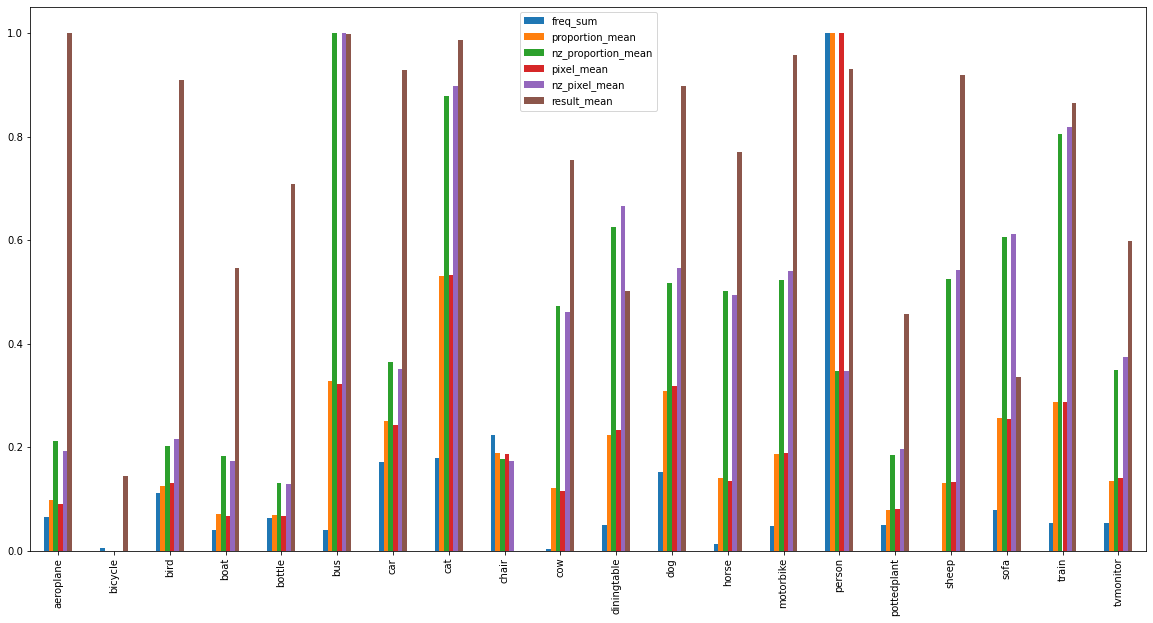

In [10]:
label_stats_df = pd.concat(label_stats+[result_mean], axis=1)
label_stats_df.columns = "freq_sum, proportion_mean, nz_proportion_mean, pixel_mean, nz_pixel_mean, result_mean".split(", ")

normed_label_stats_df = (label_stats_df-label_stats_df.min())/(label_stats_df.max()-label_stats_df.min())

normed_label_stats_df.plot(kind='bar', figsize=(20,10))


In [11]:

label_stats_df['freq_prop'] = label_stats_df['freq_sum'] * label_stats_df['proportion_mean']
label_stats_df['freq_nz_prop'] = label_stats_df['freq_sum'] * label_stats_df['nz_proportion_mean']




In [12]:
cols = list(label_stats_df.columns)
print(cols)

['freq_sum', 'proportion_mean', 'nz_proportion_mean', 'pixel_mean', 'nz_pixel_mean', 'result_mean', 'freq_prop', 'freq_nz_prop']


In [13]:
for col in cols:
    if col == 'result_mean':
        continue
    x = label_stats_df[col]
    y = label_stats_df['result_mean']
    corr = np.corrcoef(x,y)[0][1] 
    print(f"pearsons correlation {col}: {corr:.4f}", )


pearsons correlation freq_sum: 0.1493
pearsons correlation proportion_mean: 0.3560
pearsons correlation nz_proportion_mean: 0.4676
pearsons correlation pixel_mean: 0.3536
pearsons correlation nz_pixel_mean: 0.4598
pearsons correlation freq_prop: 0.2132
pearsons correlation freq_nz_prop: 0.3560


freq_sum pearsonr : 0.1493   pval : 0.5299
freq_sum spearmanr : 0.1475   pval : 0.5348
freq_sum kendalltau : 0.1220   pval : 0.4548

proportion_mean pearsonr : 0.3560   pval : 0.1235
proportion_mean spearmanr : 0.4060   pval : 0.0757
proportion_mean kendalltau : 0.3053   pval : 0.0638

nz_proportion_mean pearsonr : 0.4676   pval : 0.0376
nz_proportion_mean spearmanr : 0.4436   pval : 0.0501
nz_proportion_mean kendalltau : 0.3368   pval : 0.0398

pixel_mean pearsonr : 0.3536   pval : 0.1262
pixel_mean spearmanr : 0.4286   pval : 0.0594
pixel_mean kendalltau : 0.3158   pval : 0.0548

nz_pixel_mean pearsonr : 0.4598   pval : 0.0414
nz_pixel_mean spearmanr : 0.3865   pval : 0.0923
nz_pixel_mean kendalltau : 0.2842   pval : 0.0855



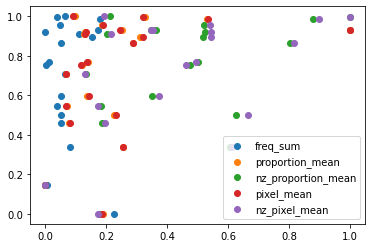

In [14]:
for col in cols:
    if col == 'result_mean' or col not in normed_label_stats_df:
        continue
    x = normed_label_stats_df[col]
    y = normed_label_stats_df['result_mean']
    rho, pval = stats.pearsonr(x,y)
    print(f"{col} pearsonr : {rho:.4f}   pval : {pval:.4f}")
    rho, pval = stats.spearmanr(x,y)
    print(f"{col} spearmanr : {rho:.4f}   pval : {pval:.4f}")
    rho, pval = stats.kendalltau(x,y)
    print(f"{col} kendalltau : {rho:.4f}   pval : {pval:.4f}")
    print()
    plt.scatter(x,y)
    
plt.legend((cols))